# Tutorial

In [1]:
import lostinmsh as lsm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams.update({"font.size": 15})

## Define the polygon

First we need to define the polygon from its vertices given as a sequence of 2d points and we also need to provide a name.

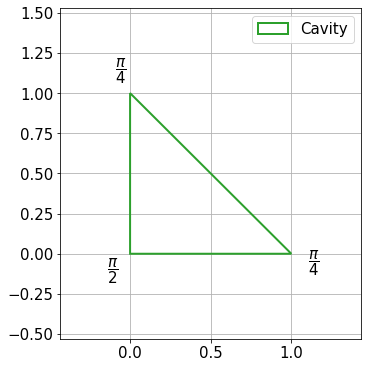

In [2]:
vertices = [[0, 0], [1, 0], [0, 1]]
polygon = lsm.Polygon.from_vertices(vertices, "Cavity")

fig, ax = plt.subplots(figsize=[5, 5], layout="constrained")
lsm.plot_polygon(polygon, ax=ax)

## Define the geometry

Then, we need to define the geometry from a polygon and a border.
Two type of borders are implemented Circular and Rectangular borders without with a PML.
The border can be given explicitly.

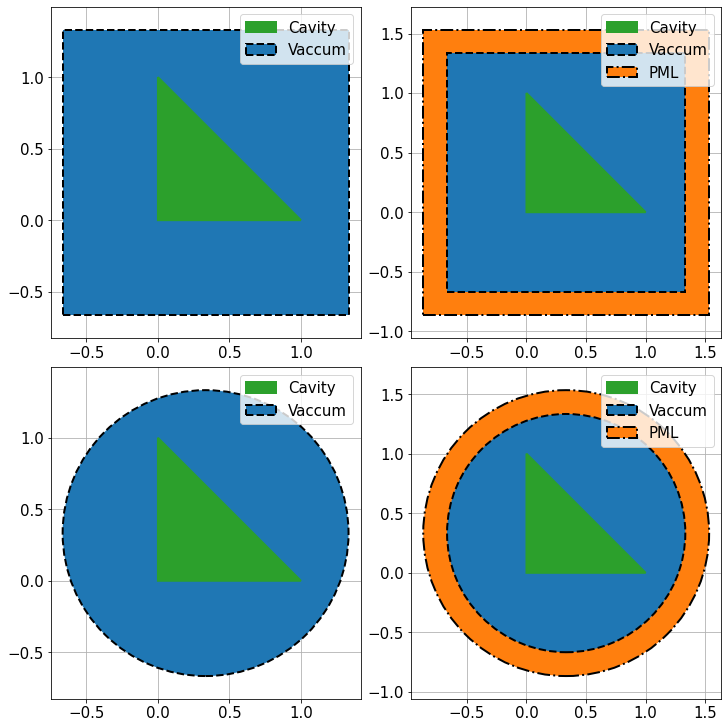

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[10, 10], layout="constrained")
center = np.array([1 / 3, 1 / 3])
borders = [
    [
        lsm.Rectangular(center=center, half_width=1, half_height=1),
        lsm.Rectangular(center=center, half_width=1, half_height=1, thickness=0.2),
    ],
    [
        lsm.Circular(center=center, radius=1),
        lsm.Circular(center=center, radius=1, thickness=0.2),
    ],
]

for i in range(2):
    for j in range(2):
        border, ax = borders[i][j], axs[i, j]
        geometry = lsm.Geometry.from_polygon(polygon, border)
        lsm.plot_geometry(geometry, ax=ax)

Or the border can be computed automaticaly.

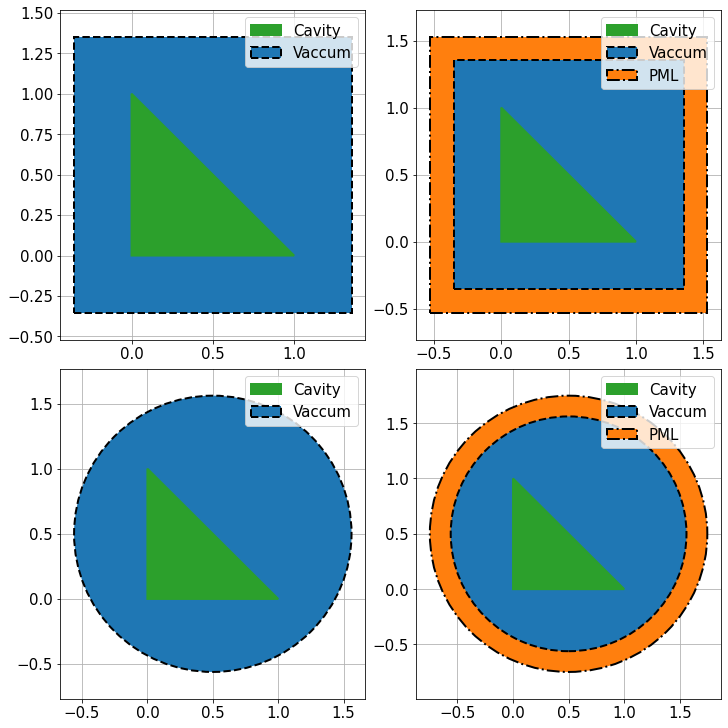

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=[10, 10], layout="constrained")
borders = [
    [
        lsm.AutoRectangular(border_factor=0.5),
        lsm.AutoRectangular(border_factor=0.5, thickness_factor=0.25),
    ],
    [
        lsm.AutoCircular(border_factor=0.5),
        lsm.AutoCircular(border_factor=0.5, thickness_factor=0.25),
    ],
]

for i in range(2):
    for j in range(2):
        border, ax = borders[i][j], axs[i, j]
        geometry = lsm.Geometry.from_polygon(polygon, border)
        lsm.plot_geometry(geometry, ax=ax)

## Mesh the geometry

In [5]:
lsm.mesh(geometry, 0.1, lsm.GmshOptions(gui=True))

Info    : Increasing process stack size (8192 kB < 16 MB)


## Locally structured mesh the geometry

In [6]:
lsm.mesh_loc_struct(geometry, 0.1, lsm.GmshOptions(gui=True))